# Exploring automobile data with ggplot2 και seaborn
### Many times it is more practical to make our graphs with a higher level library than matplotlib.
### Two such libraries are:

 * [ggplot2](https://ggplot2.tidyverse.org/), which in Python has been ported as [plotnine](https://plotnine.readthedocs.io/en/stable/).

 * [seaborn](https://seaborn.pydata.org/)


In [1]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

* We will use data from https://fueleconomy.gov/.

* Specifically, the data is available at: https://fueleconomy.gov/feg/ws/.

* We will use the vehicle data. (https://fueleconomy.gov/feg/epadata/vehicles.csv.zip).

* ggplot2 includes a subset of the data.

* The subset contains a small number of columns, and only models that had new releases in each year from 1999 to 2008 (to include popular cars).

* Here is the included subset, which is called `mpg`.

In [2]:
from plotnine.data import mpg
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


* In the full dataset, which we will call `fmpg`, we will only use the columns that are also present in the smaller dataset.

In [3]:
usecols = [
    'model',
    'make',
    'year', 
    'cylinders',
    'drive',
    'trany',
    'displ',
    'highway08',
    'city08',
    'fuelType',
    'VClass'
]

In [4]:
fmpg = pd.read_csv('vehicles.csv.zip', usecols=usecols)
fmpg

,city08,cylinders,displ,drive,fuelType,highway08,make,model,trany,VClass,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* Για να κάνουμε τη ζωή μας πιο εύκολη, θα μετονομάσουμε τις στήλες του πλήρους συνόλου ώστε να έχουν τα ίδια ονόματα με αυτές του υποσυνόλου.

In [5]:
fmpg.rename(columns={
        'highway08': 'hwy', 
        'city08': 'city',
        'fuelType': 'fl',
        'VClass': 'class',
        'trany': 'trans',
        'cylinders': 'cyl',
        'drive': 'drv'
    }, inplace=True)
fmpg

,city,cyl,displ,drv,fl,hwy,make,model,trans,class,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* To make a graph with ggplot2, we start by giving `ggplot()`. This creates a coordinate system.

* We add layers to this system.

* To make a *scatter plot*, we add a layer by giving `geom_point()`.

* This is just one of the so-called *geometries* available in ggplot2.

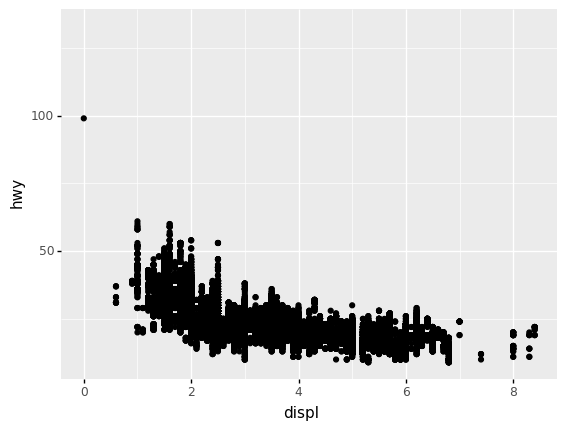

<ggplot: (329102361)>

In [6]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) # we remore NaNs to avoid getting a warning

* We immediately see a problem with an outlier that has a machine size equal to zero.

* We will get rid of it.

In [7]:
fmpg.query('displ > 0', inplace=True)

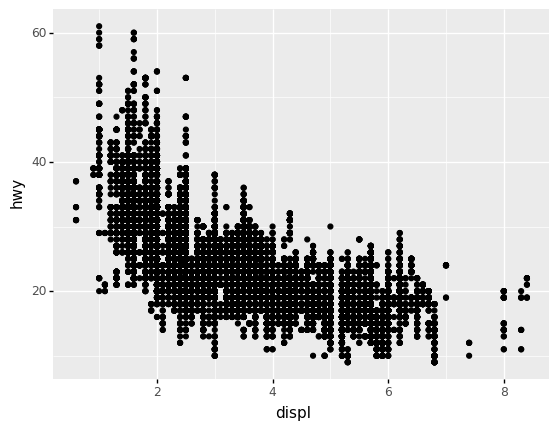

<ggplot: (329172173)>

In [8]:
ggplot(data=fmpg) + \
  geom_point(mapping = aes(x = 'displ', y = 'hwy'), na_rm=True)

* And here's how we can get the same plot as seaborn, giving `scatterplot()`.

<AxesSubplot:xlabel='displ', ylabel='hwy'>

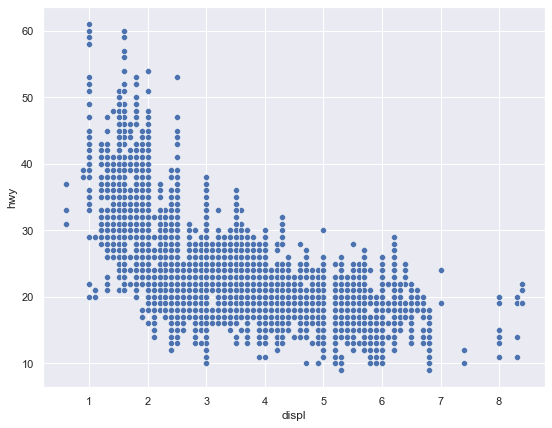

In [9]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(9, 7)})
sns.scatterplot(x='displ', y='hwy', data=fmpg)

* In ggplot2 we can change the size and transparency of the points by passing the appropriate parameters to `geom_point()`.

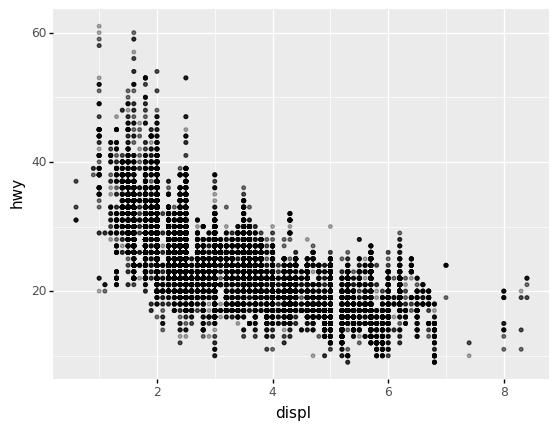

<ggplot: (329752037)>

In [10]:
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy'), 
             na_rm=True, size=1, alpha=0.3)

* Similarly with seaborn.

<AxesSubplot:xlabel='displ', ylabel='hwy'>

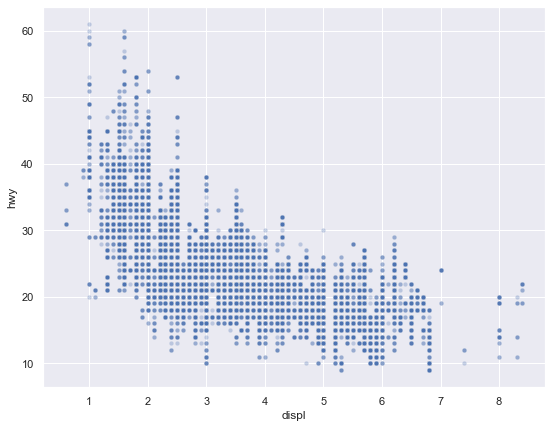

In [11]:
sns.scatterplot(x='displ', y='hwy', s=20, data=fmpg, alpha=0.3)

* Each geometry needs a mapping that defines, via the `aes()` call, how the data will be mapped to aesthetic parameters of the diagram.

* We already used the `x` and `y` parameters of `aes()`.

* We can also use other parameters, such as color for some property of the data.

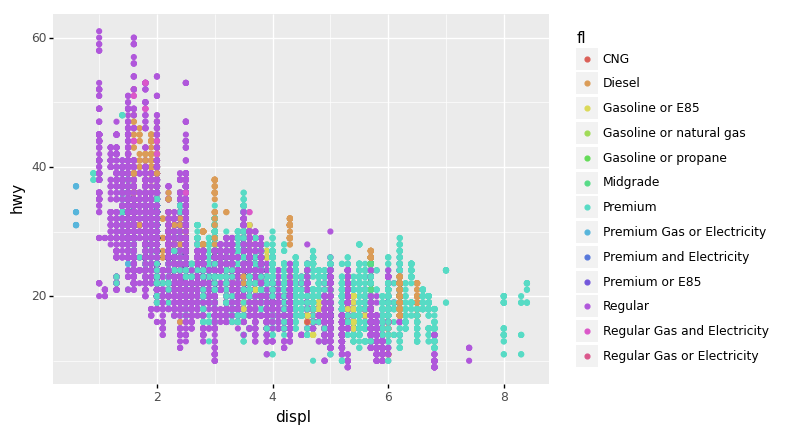

<ggplot: (330176627)>

In [12]:
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy', color='fl'), 
             na_rm=True)

* In seaborn we can achieve the same result with the `hue` parameter.

* Here we use `relplot()` instead of `scatterplot()`.

* `relplot()` is a generalization of `scatterplot()` that works on figure level instead of matplotlib axes as `scatterplot()` does.

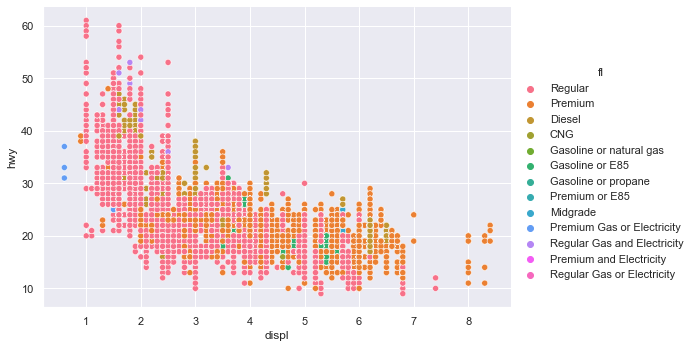

In [13]:
sns.relplot(x='displ', y='hwy', hue='fl', height=5, aspect=1.5, data=fmpg)

* In any case we see that we have many different fuels already.

* And maybe some of them are not used much.

In [14]:
fmpg.groupby('fl').size()

fl
CNG                               60
Diesel                          1231
Gasoline or E85                 1371
Gasoline or natural gas           20
Gasoline or propane                8
Midgrade                         142
Premium                        13206
Premium Gas or Electricity        55
Premium and Electricity          129
Premium or E85                   127
Regular                        27902
Regular Gas and Electricity       77
Regular Gas or Electricity         4
dtype: int64

* Well, we will group them into fewer categories.

In [15]:
fmpg.loc[fmpg['fl'].str.startswith('Gasoline'), 'fl'] = 'Gasoline'
fmpg.loc[fmpg['fl'].str.startswith('Premium'), 'fl'] = 'Premium'
fmpg.loc[fmpg['fl'].str.startswith('Regular'), 'fl'] = 'Regular'

fmpg.groupby('fl').size()

fl
CNG            60
Diesel       1231
Gasoline     1399
Midgrade      142
Premium     13517
Regular     27983
dtype: int64

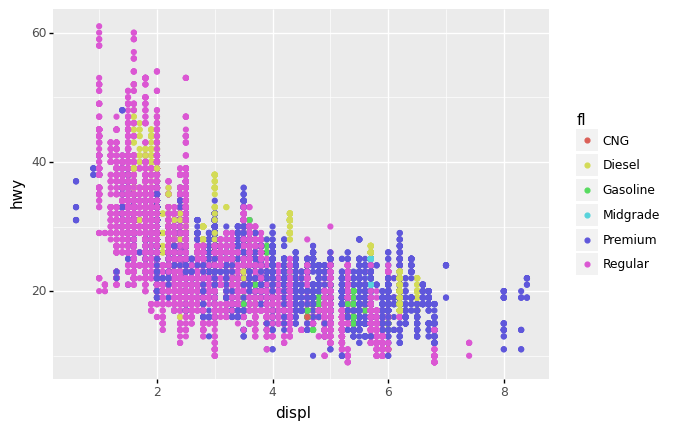

<ggplot: (330158403)>

In [16]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x = 'displ', y = 'hwy', color='fl'), 
               na_rm=True)

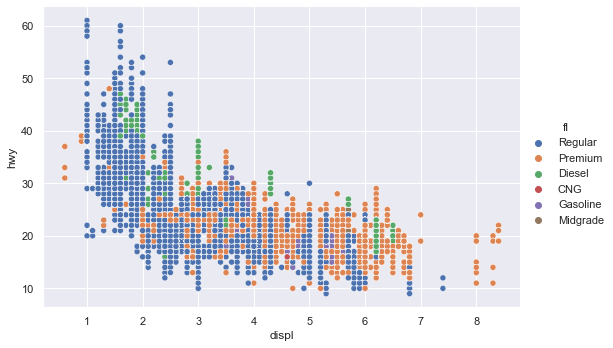

In [17]:
sns.relplot(x='displ', y='hwy', hue='fl', height=5, aspect=1.5, data=fmpg)

* To further explore our data, using the `class' property of vehicles.

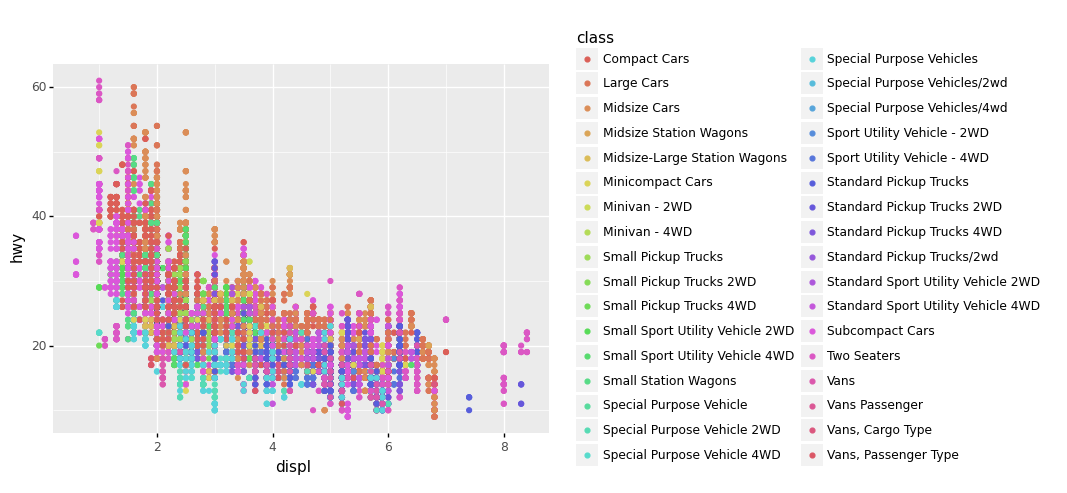

<ggplot: (329706195)>

In [18]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy', color='class'), 
               na_rm=True)

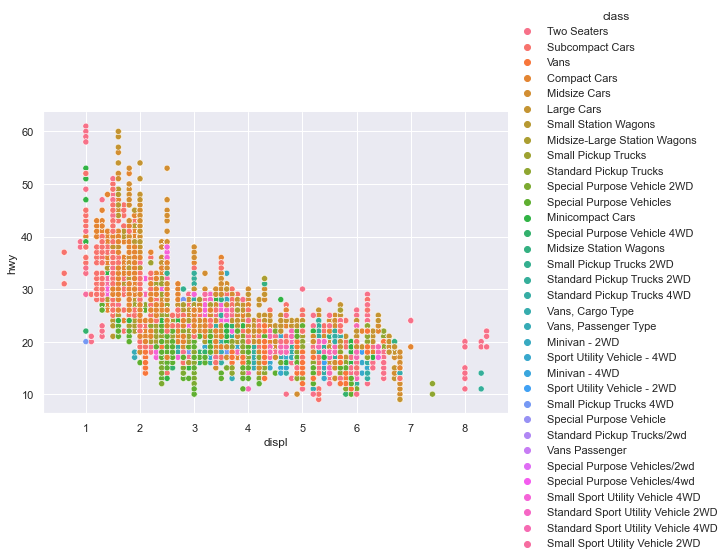

In [19]:
sns.relplot(x='displ', y='hwy', hue='class', height=5, aspect=1.5, data=fmpg)

* We see again that we have too many classes.

* ggplot2 handled them with relative grace, but seaborn probably not so much, legend-wise.

* In any case we will again limit the number of classes.

In [20]:
fmpg.loc[fmpg['class'].str.startswith('Small Pickup Trucks'), 'class'] = 'Small Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Standard Pickup Trucks'), 'class'] = 'Standard Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Special Purpose Vehicle'), 'class'] = 'Special Purpose Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Sport Utility Vehicle'), 'class'] = 'Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Small Sport Utility Vehicle'), 'class'] = 'Small Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Standard Sport Utility Vehicle'), 'class'] = 'Standard Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Minivan'), 'class'] = 'Minivan'
fmpg.loc[fmpg['class'].str.startswith('Vans'), 'class'] = 'Vans'

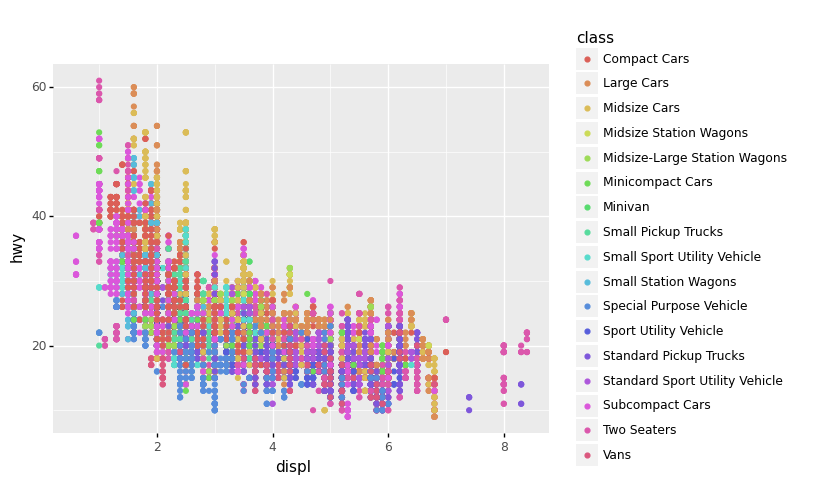

<ggplot: (330166348)>

In [21]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy', color='class'), 
               na_rm=True)

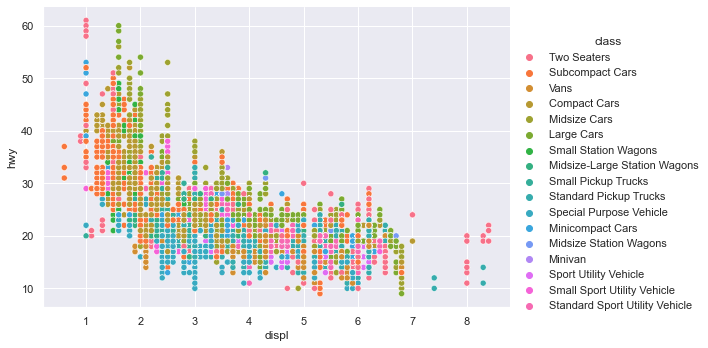

In [22]:
sns.relplot(x='displ', y='hwy', hue='class', height=5, aspect=1.5, data=fmpg)

* Now we will proceed to make a corresponding chart, but we will use the `year` property for the color.

* We can see that fuel consumption improves over time.

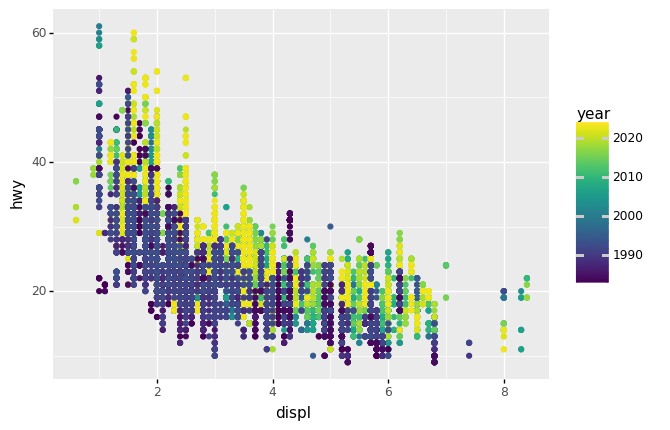

<ggplot: (331507122)>

In [23]:
ggplot(data=fmpg) + \
  geom_point(mapping=aes(x='displ', y='hwy', color='year'), 
             na_rm=True)

* If we try to get the same diagram as seaborn we will see that the legend is perhaps less informative.

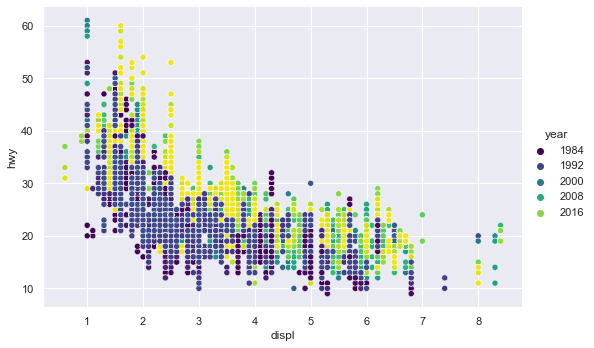

In [24]:
g = sns.relplot(x='displ', y='hwy', hue='year', palette='viridis', 
                height=5, aspect=1.5, data=fmpg)

* With a little more work we can put in a color bar, just like in ggplot2.

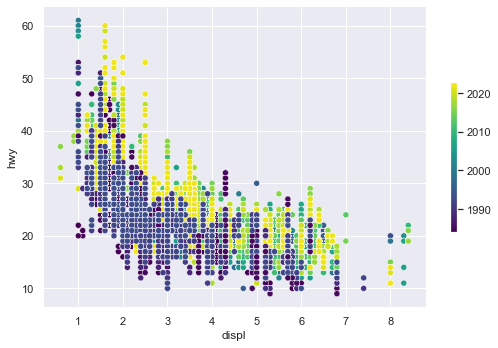

In [25]:
sns.set_style('dark')
norm = plt.Normalize(fmpg.year.min(), fmpg.year.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
g = sns.relplot(x='displ', y='hwy', hue='year', palette='viridis',
                height=5, aspect=1.5, legend=False, data=fmpg)
g.fig.colorbar(sm, shrink=0.5)
plt.grid()

* Let's move on to consumption, taking into account the number of cylinders.

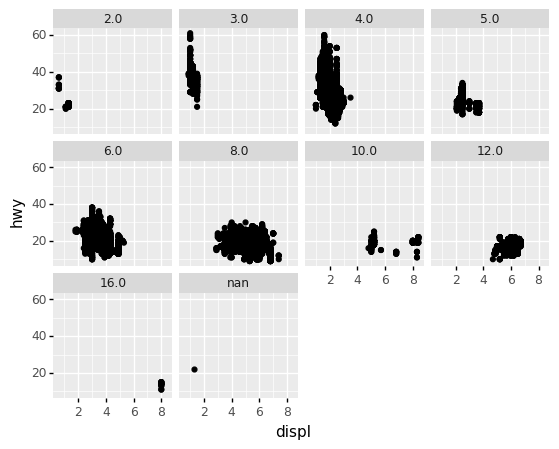

<ggplot: (332659161)>

In [26]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~cyl')

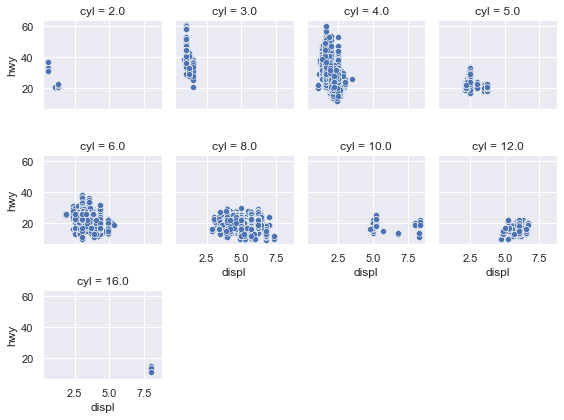

In [27]:
sns.set_theme()
sns.relplot(x='displ', y='hwy', col='cyl', 
            height=2, aspect=1,
            col_wrap=4, data=fmpg)

* Or let's see what comes up in terms of type of movement.

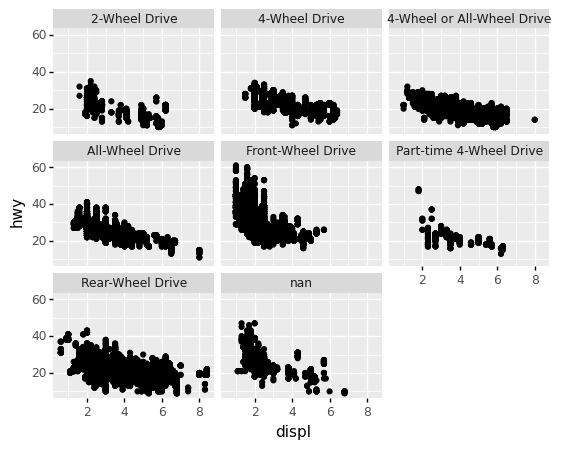

<ggplot: (329241980)>

In [28]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~drv')

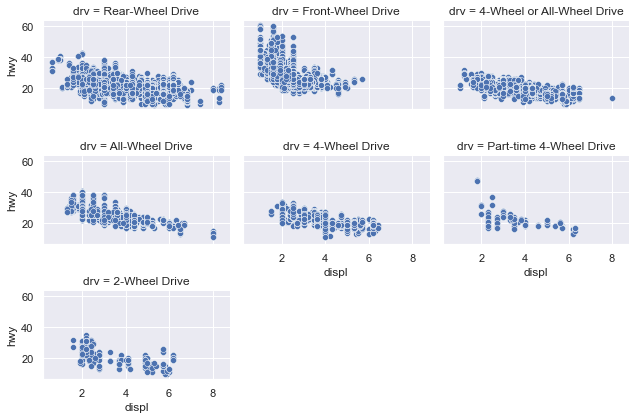

In [29]:
sns.relplot(x='displ', y='hwy', col='drv', 
            height=2, aspect=1.5,
            col_wrap=3, data=fmpg)

* Once again we see different values ​​for the `drv` property that we probably don't care about, so we homogenize them.

In [30]:
fmpg.loc[fmpg['drv'].str.contains('4-Wheel', na=False), 'drv'] = '4W'
fmpg.loc[fmpg['drv'].str.contains('All-Wheel', na=False), 'drv'] = '4W'
fmpg.loc[fmpg['drv'].str.contains('2-Wheel', na=False), 'drv'] = '2W'
fmpg.loc[fmpg['drv'].str.contains('Rear-Wheel', na=False), 'drv'] = 'R'
fmpg.loc[fmpg['drv'].str.contains('Front-Wheel', na=False), 'drv'] = 'F'

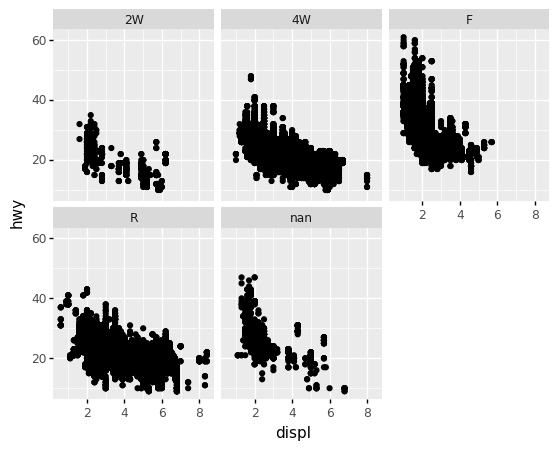

<ggplot: (329374916)>

In [31]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_wrap('~drv')

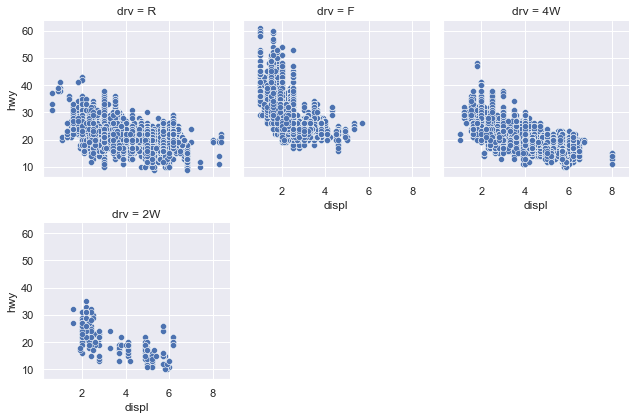

In [32]:
sns.relplot(x='displ', y='hwy', col='drv', 
            height=3, aspect=1,
            col_wrap=3, data=fmpg)

* So we can also make diagrams that contrast the `drv` and `cyl` properties.

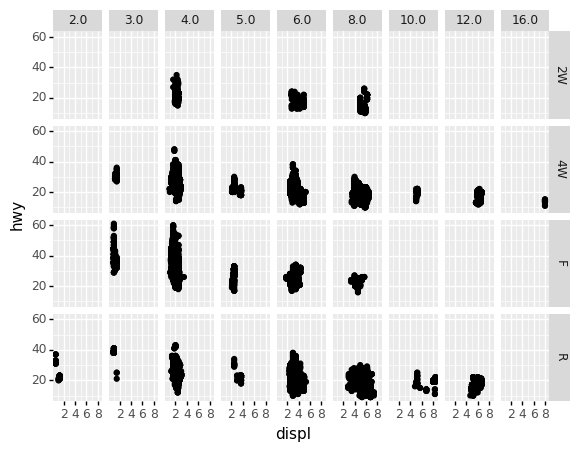

<ggplot: (329305510)>

In [33]:
ggplot(data = fmpg.query('(cyl == cyl) & (drv == drv)')) + \
    geom_point(mapping=aes(x='displ', y='hwy'), na_rm=True) + \
    facet_grid('drv ~ cyl')

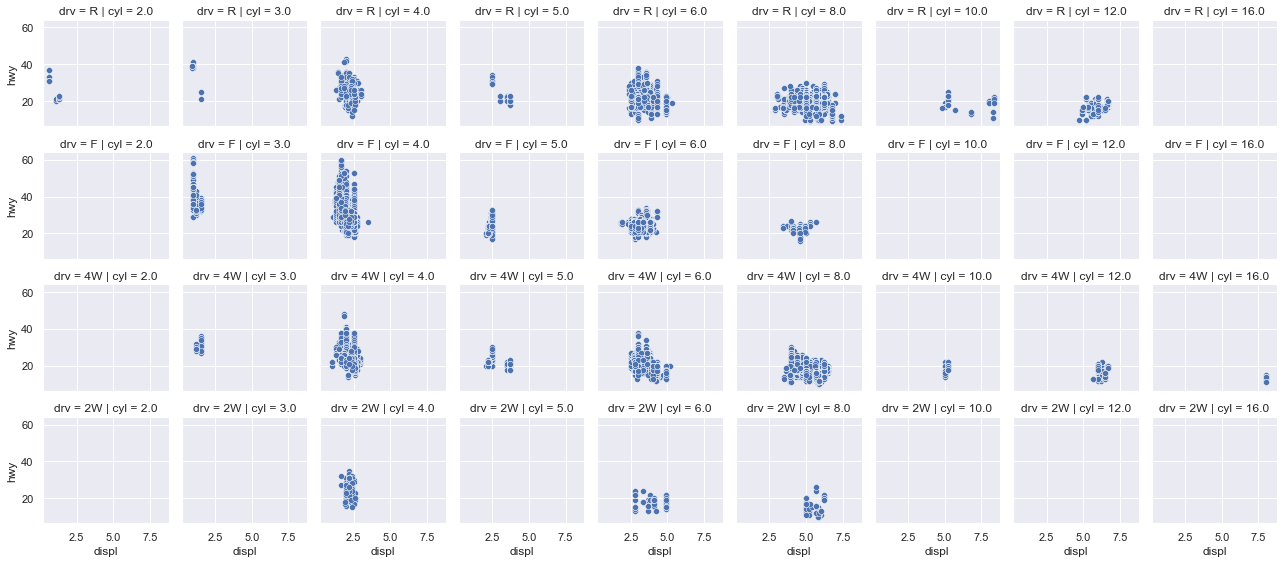

In [34]:
sns.relplot(x='displ', y='hwy', col='cyl', row='drv', 
            height=2, aspect=1,
            data=fmpg)

* Let's go back to our original diagram with the `displ` property versus `hwy`.

* In ggplot2 we can add layers by adding geometries.

* So we can add a line to fit the data.

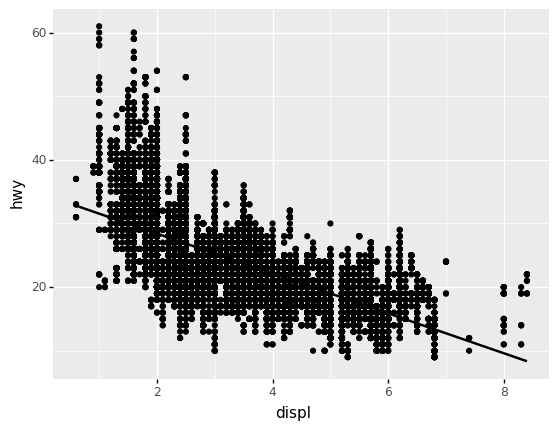

<ggplot: (331457290)>

In [35]:
ggplot(data=fmpg) + \
    geom_point(mapping=aes(x = 'displ', y = 'hwy')) + \
    geom_smooth(mapping=aes(x = 'displ', y = 'hwy'), stat='smooth')

* The same result can be achieved in seaborn with `regplot()`.

<AxesSubplot:xlabel='displ', ylabel='hwy'>

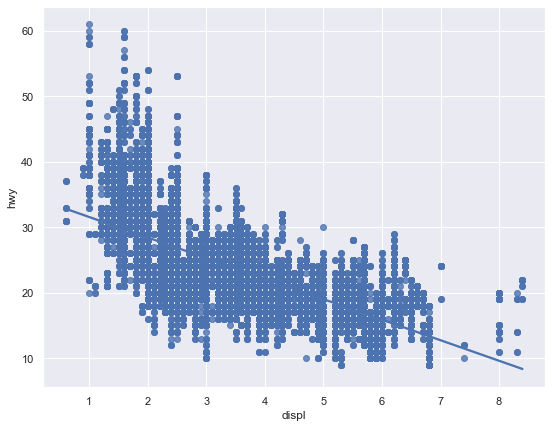

In [36]:
sns.regplot(x='displ', y='hwy', data=fmpg)

* If we want we can generate lines for separate subsets of the data.

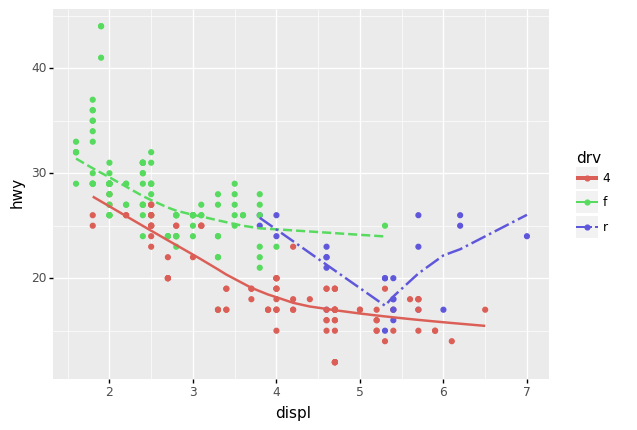

<ggplot: (332412507)>

In [37]:
ggplot(data=mpg) + \
    geom_point(mapping=aes(x='displ', y ='hwy', color='drv')) + \
    stat_smooth(mapping=aes(x='displ', y='hwy', color='drv', linetype='drv'), se=False)

* Likewise in seaborn.

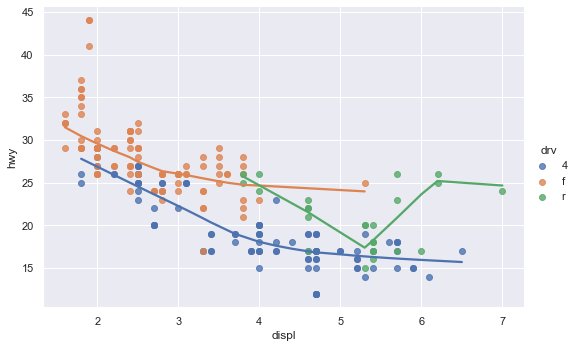

In [38]:
sns.lmplot(x='displ', y='hwy', hue='drv',
           height=5, aspect=1.5,
           lowess=True,
           data=mpg)

* If we draw a line per year we can see more clearly the improvement in fuel consumption over time.

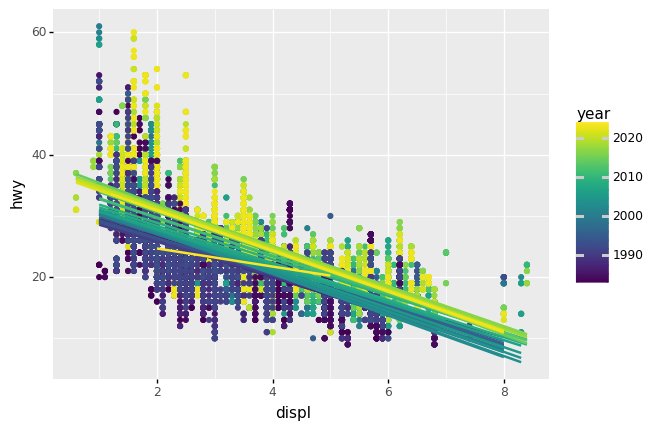

<ggplot: (332770726)>

In [39]:
ggplot(data = fmpg) + \
    geom_point(mapping = aes(x='displ', y='hwy', color='year'), 
               na_rm=True) + \
    stat_smooth(mapping=aes(x='displ', y='hwy', group='year', color='year'),
                se=False)

* Likewise in seaborn.

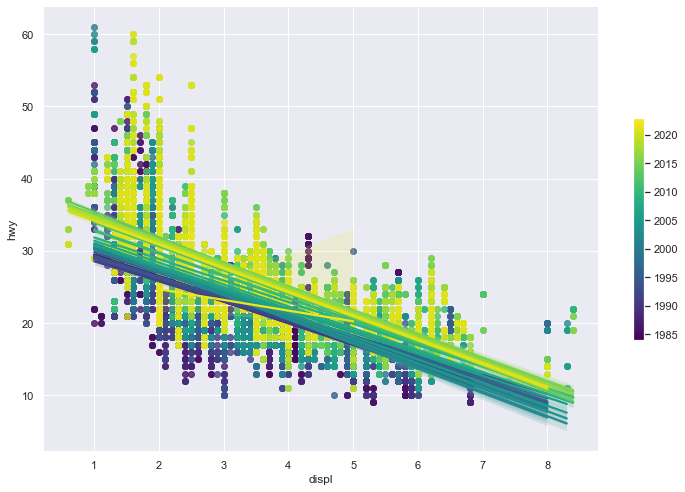

In [40]:
sns.set_style("dark")
norm = plt.Normalize(fmpg.year.min(), fmpg.year.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
g = sns.lmplot(x='displ', y='hwy', hue='year', palette='viridis', 
           height=7, aspect=1.5, legend=False, data=fmpg)
g.fig.colorbar(sm, shrink=0.5)
plt.grid()